In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("E:\Учеба\Магистратура 2 семестр\Методы машинного обучения\lectures\classical_ml_urfu\Assignments\Assignment_3\dataset_diabetes\diabetic_data.csv")

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
for row in df.columns:
    if df[row].dtype == object:
         print(row,df[row][df[row] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [8]:
df = df.drop(columns = ['encounter_id', 'patient_nbr', 'weight' ,'admission_type_id', 'discharge_disposition_id', 'admission_source_id','payer_code' ] )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   time_in_hospital          101766 non-null  int64 
 4   medical_specialty         101766 non-null  object
 5   num_lab_procedures        101766 non-null  int64 
 6   num_procedures            101766 non-null  int64 
 7   num_medications           101766 non-null  int64 
 8   number_outpatient         101766 non-null  int64 
 9   number_emergency          101766 non-null  int64 
 10  number_inpatient          101766 non-null  int64 
 11  diag_1                    101766 non-null  object
 12  diag_2                    101766 non-null  object
 13  diag_3                    101766 non-null  object
 14  numb

In [10]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
df = df.replace(to_replace ="?",value ="None")
df.head()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,None,59,0,18,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,None,11,5,13,2,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,None,44,1,16,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,None,51,0,8,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()

age
8     26068
7     22483
6     17256
9     17197
5      9685
4      3775
10     2793
3      1657
2       691
1       161
Name: count, dtype: int64

In [13]:
df.head()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,1,1,Pediatrics-Endocrinology,41,0,1,0,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,2,3,None,59,0,18,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,3,2,None,11,5,13,2,0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,4,2,None,44,1,16,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,5,1,None,51,0,8,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
from sklearn.preprocessing import LabelEncoder
# get only categorical columns list
cat_feats= [col for col in df.columns if df[col].dtypes == 'object']

# encode the categorical features 
encoder = LabelEncoder()
df[cat_feats] = df[cat_feats].apply(encoder.fit_transform)

In [15]:
from sklearn.model_selection import train_test_split

y = df['diabetesMed']
X = df.drop(columns = 'diabetesMed')

# split data into train and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, shuffle=True,
                                                     random_state=20)

In [16]:
print("Train: ", X_train.shape , Y_train.shape)
print("Test: ", X_test.shape , Y_test.shape)

Train:  (71236, 42) (71236,)
Test:  (30530, 42) (30530,)


In [17]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(fit_intercept=True, penalty='l1', solver='liblinear')

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)

e:\Учеба\Магистратура 2 семестр\Методы машинного обучения\lectures\classical_ml_urfu\MLenv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
Y_test

76040    0
22556    1
84478    1
13445    0
29977    1
        ..
19383    1
34927    1
16327    0
37889    0
47382    1
Name: diabetesMed, Length: 30530, dtype: int32

In [20]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
pd.DataFrame(Y_pred)[0].value_counts()

0
1    23888
0     6642
Name: count, dtype: int64

In [22]:
from sklearn import metrics
cfmatrix_1 = metrics.confusion_matrix(Y_test, Y_pred)
cfmatrix_1

array([[ 4859,  2183],
       [ 1783, 21705]], dtype=int64)

In [23]:
pd.DataFrame(cfmatrix_1)

,0,1
0,4859,2183
1,1783,21705


<Axes: >

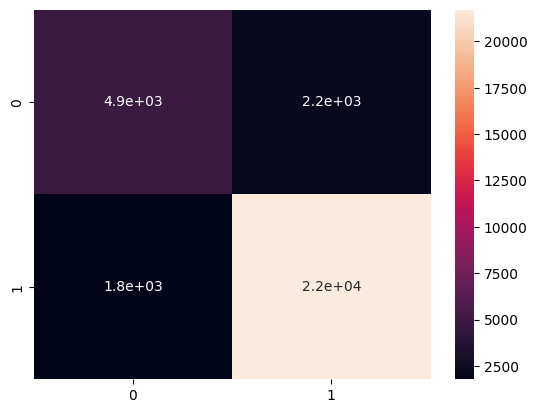

In [24]:
sns.heatmap(pd.DataFrame(cfmatrix_1), annot=True)

In [25]:
model.score(X_test, Y_test)

0.8700949885358663

In [26]:
#Export Model
import pickle

pickle.dump(model, open('diabetes.pkl', 'wb'))

In [27]:
modelPickled =  pickle.load(open("diabetes.pkl", 'rb'))

In [36]:
modelPickled.predict([[0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1]])

e:\Учеба\Магистратура 2 семестр\Методы машинного обучения\lectures\classical_ml_urfu\MLenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [37]:
modelPickled.predict([[X_test]])

e:\Учеба\Магистратура 2 семестр\Методы машинного обучения\lectures\classical_ml_urfu\MLenv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 4. LogisticRegression expected <= 2.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int32
 1   gender                    101766 non-null  int32
 2   age                       101766 non-null  int64
 3   time_in_hospital          101766 non-null  int64
 4   medical_specialty         101766 non-null  int32
 5   num_lab_procedures        101766 non-null  int64
 6   num_procedures            101766 non-null  int64
 7   num_medications           101766 non-null  int64
 8   number_outpatient         101766 non-null  int64
 9   number_emergency          101766 non-null  int64
 10  number_inpatient          101766 non-null  int64
 11  diag_1                    101766 non-null  int32
 12  diag_2                    101766 non-null  int32
 13  diag_3                    101766 non-null  int32
 14  number_diagnoses    